In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import mglearn

/opt/conda/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
data = np.loadtxt('data_public/data_train.csv', delimiter=',', dtype=float)
labels = np.loadtxt('data_public/label_train.csv', dtype=float)
test = np.loadtxt('data_public/data_test.csv', delimiter=',', dtype=float)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=0)

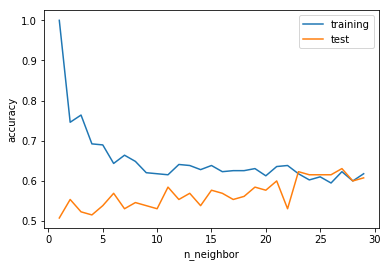

In [7]:
training = []
test = []
ran = range(1,30)
for i in ran:
  clf = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  training.append(clf.score(X_train, y_train))
  test.append(clf.score(X_test, y_test))

plt.plot(ran, training, label='training')
plt.plot(ran, test, label='test')
plt.xlabel('n_neighbor')
plt.ylabel('accuracy')
plt.legend()

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

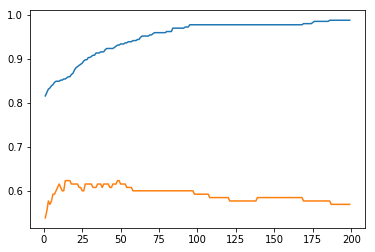

In [97]:
tr = []
test = []
params = np.linspace(0, 1, 10000)[1:200]
for i in params:
    logreg = LogisticRegression(C=i, penalty="l2", solver='lbfgs').fit(X_train, y_train)
    tr.append(logreg.score(X_train, y_train))
    test.append(logreg.score(X_test, y_test))
plt.plot(range(1, 200), tr, label='train')
plt.plot(range(1, 200), test, label='test')
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
forest = RandomForestClassifier(n_estimators=20000, max_features=10, n_jobs=-1).fit(X_train, y_train)
y_pred = forest.predict(X_test)
res = forest.predict_proba(X_test)[:,1]
print(res)
roc_auc_score(y_test, res)

[ 0.49725  0.52825  0.54115  0.5421   0.4811   0.49505  0.499    0.49155
  0.47755  0.50235  0.50715  0.4453   0.4873   0.52905  0.5451   0.5812
  0.45565  0.44675  0.41935  0.5524   0.48635  0.4337   0.50835  0.51705
  0.4723   0.5445   0.5008   0.52035  0.43855  0.52805  0.5232   0.52445
  0.4556   0.47735  0.4774   0.4976   0.48195  0.51025  0.49125  0.503
  0.5092   0.51685  0.5109   0.5204   0.5421   0.52655  0.44205  0.49815
  0.4964   0.43155  0.4842   0.54185  0.43155  0.5238   0.44465  0.45355
  0.51825  0.5136   0.46255  0.54645  0.50975  0.4575   0.48145  0.53145
  0.462    0.49815  0.5139   0.46925  0.478    0.50785  0.523    0.4917
  0.5191   0.464    0.47875  0.51615  0.48285  0.51785  0.4571   0.51705
  0.4849   0.48995  0.507    0.56365  0.4726   0.5356   0.51085  0.51005
  0.48925  0.53885  0.48705  0.53065  0.50795  0.52755  0.52815  0.47645
  0.46515  0.4456   0.51235  0.499    0.4764   0.46125  0.527    0.46905
  0.54685  0.4294   0.52035  0.5239   0.49965  0.4696  

0.67647058823529416

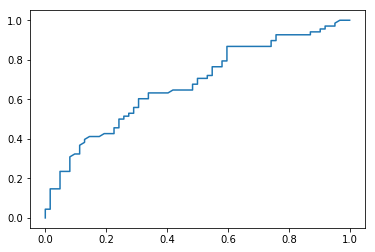

In [10]:
from sklearn.metrics import roc_curve
fp, tp, t = roc_curve(y_test, res)
plt.plot(fp, tp)

In [70]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
svm = SVC(C=5, gamma='auto')
svm.fit(X_train_scaled, y_train)
print(svm.score(X_train_scaled, y_train))
print(svm.score(X_test_scaled, y_test))

1.0
0.584615384615


In [81]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
data_t = scaler.fit_transform(data)

pca = PCA(n_components=5)
pca.fit(data_t)

data_pca = pca.transform(data_t)


In [76]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(data_pca, labels, random_state=0)

In [80]:
forest = RandomForestClassifier(n_estimators=8000, n_jobs=-1).fit(X_train_pca, y_train)
print(forest.score(X_train_pca, y_train))
print(forest.score(X_test_pca, y_test))

1.0
0.576923076923


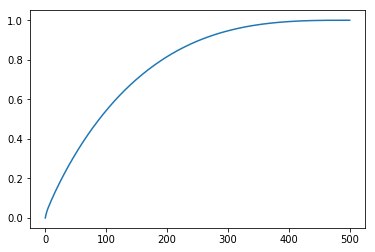

In [83]:
pca = PCA()
pca.fit(data_t)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio)
plt.show()

In [93]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
X_train_p = poly.transform(X_train)
X_test_p = poly.transform(y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[-1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
 -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1.
  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.
  1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.
  1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1. -1.
  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.
  1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.
 -1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.
 -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1.
  1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.
  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.
 -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.
  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.
  1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1.
  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1.
  1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [105]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=40)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_train_selected.shape

(390, 200)

In [98]:
logreg = LogisticRegression(C=0.025, penalty="l2", solver='lbfgs').fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.989743589744
0.569230769231


In [109]:
logreg = LogisticRegression(C=0.1, penalty="l2", solver='lbfgs').fit(X_train_selected, y_train)
X_test_selected = select.transform(X_test)
print(logreg.score(X_train_selected, y_train))
print(logreg.score(X_test_selected, y_test))

0.938461538462
0.546153846154


In [118]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold='median')
sel.fit(X_train, y_train)
X_train_l1 = sel.transform(X_train)
# print(X_train_l1.shape)
logreg = LogisticRegression(C=0.1, penalty="l2", solver='lbfgs').fit(X_train_l1, y_train)
X_test_l1 = sel.transform(X_test)
print(logreg.score(X_train_l1, y_train))
print(logreg.score(X_test_l1, y_test))

0.933333333333
0.561538461538


In [119]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=200)
sel.fit(X_train, y_train)
X_train_l1 = sel.transform(X_train)
# print(X_train_l1.shape)
logreg = LogisticRegression(C=0.1, penalty="l2", solver='lbfgs').fit(X_train_l1, y_train)
X_test_l1 = sel.transform(X_test)
print(logreg.score(X_train_l1, y_train))
print(logreg.score(X_test_l1, y_test))

0.935897435897
0.515384615385


In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(C=0.03, penalty="l2", solver='lbfgs'), data, labels, cv=loo)
print(scores.mean())

0.532692307692


In [127]:
X_test.shape

(130, 500)

In [171]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test)

In [132]:
X_train

array([[-0.77260464,  0.03121895, -0.68857331, ..., -0.44669161,
        -0.50913696, -2.29658265],
       [-1.10083537,  1.24682414,  0.15074498, ...,  1.49657613,
        -0.97279935,  0.39541787],
       [ 0.21208755,  0.86004067,  1.11349244, ..., -1.20710073,
        -0.04547458,  0.76771581],
       ..., 
       [ 2.40029242, -0.32793713,  0.94069161, ..., -0.108732  ,
         0.4181878 , -1.38015694],
       [ 0.5950234 , -0.18980017, -2.04629408, ...,  1.07412662,
         1.34551257,  0.82499242],
       [ 0.29414523, -0.60421103,  0.57040413, ..., -0.61567142,
         0.4181878 , -1.0651356 ]])

In [147]:
param_grid = {'C':[10**4, 10**5, 10**6, 10**7], 'gamma':[1e-04, 1e-03, 1e-02, 1e-01]}
from sklearn.model_selection import GridSearchCV
grid_s = GridSearchCV(SVC(), param_grid, cv=5).fit(X_train_scaled, y_train)
grid_s.score(X_test_scaled, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.57692307692307687

In [135]:
grid_s.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

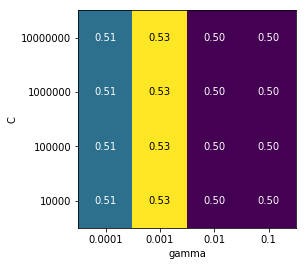

In [148]:
results = pd.DataFrame(grid_s.cv_results_)
scores = np.array(results.mean_test_score).reshape(4,4)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], ylabel='C', cmap='viridis')

In [155]:
y_pred = grid_s.predict(X_test_scaled)
y_pred.shape
test.shape

AttributeError: 'list' object has no attribute 'shape'

In [156]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)

In [162]:
conf = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.62      0.61      0.62        62
         1.0       0.65      0.66      0.66        68

   micro avg       0.64      0.64      0.64       130
   macro avg       0.64      0.64      0.64       130
weighted avg       0.64      0.64      0.64       130



In [28]:
from sklearn.metrics import roc_auc_score

print(forest.predict_proba(X_test)[:,1])
print(forest.predict(X_test))
# res = forest.predict_proba(test)[:,1]
# np.savetxt('result4.csv', res, delimiter=',', fmt='%f')

[ 0.49195  0.52295  0.54525  0.54245  0.47965  0.4929   0.49365  0.4994
  0.48135  0.4969   0.50525  0.45095  0.4982   0.52855  0.5363   0.5772
  0.4565   0.4448   0.43245  0.55935  0.4825   0.43305  0.49895  0.5153
  0.47515  0.54325  0.5017   0.5173   0.43325  0.5256   0.5202   0.51575
  0.4638   0.4706   0.4758   0.49095  0.48575  0.50585  0.4881   0.5092
  0.50905  0.5175   0.51345  0.51875  0.5437   0.51335  0.44635  0.4964
  0.4934   0.4412   0.47705  0.5352   0.43735  0.5229   0.44285  0.4646
  0.52     0.5134   0.46995  0.5531   0.5084   0.4619   0.47985  0.53465
  0.46615  0.5054   0.517    0.47355  0.4871   0.50945  0.5226   0.4866
  0.52215  0.4637   0.4782   0.5187   0.4846   0.51215  0.4546   0.515
  0.4829   0.49205  0.5026   0.5651   0.47205  0.5385   0.5153   0.51565
  0.49125  0.53775  0.47965  0.53185  0.5037   0.52725  0.5346   0.4834
  0.46275  0.4452   0.51285  0.505    0.4833   0.4527   0.52315  0.4631
  0.54155  0.43125  0.5167   0.5295   0.49525  0.47115  0.4681

In [172]:
print(roc_auc_score(y_test, grid_s.best_estimator_.decision_function(X_test_scaled)))

res = grid_s.best_estimator_.predict(test_scaled)
np.savetxt('result3.csv', res, delimiter=',', fmt='%d')

0.601043643264


In [173]:
test_scaled.shape

(520, 500)

In [26]:
forest = RandomForestClassifier(n_estimators=20000, max_features=10, n_jobs=-1).fit(X_train, y_train)

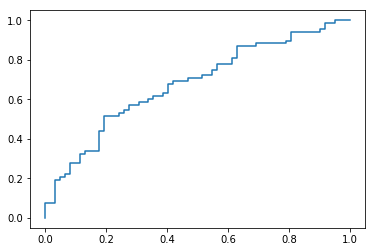

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thre = roc_curve(y_test, forest.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

In [12]:
np.savetxt('result4.csv', res, delimiter=',', fmt='%f')

In [32]:
sum(labels == 1)

264

In [34]:
pred = forest.predict_proba(X_test)

In [40]:
roc_auc_score(y_test[60:], pred[60:,1])

0.65601345668629107

array([-1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
        1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.])